In [6]:
#importing the libraries 

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from celluloid import Camera

Populating the interactive namespace from numpy and matplotlib


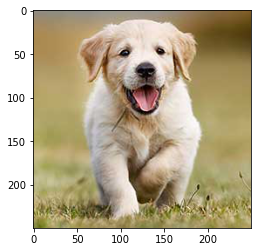

In [85]:
#looking at the image
img = mpimg.imread('dog_img.png',format='jpeg')
plt.imshow(img)



/Users/ronakpatel/opt/anaconda3/envs/DS_projects/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/ronakpatel/opt/anaconda3/envs/DS_projects/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


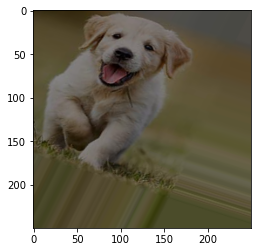

In [82]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# loading image 
img = load_img('dog_img.png')
# converting it to the numpy array
img_data = img_to_array(img)
# expanding dimension to one sample
samples = expand_dims(img_data, 0)
# data augmentation generator
datagen = ImageDataGenerator(featurewise_center=True, #list of possible combinations of augmenting the images
                             zca_whitening=True, 
                             rotation_range=30, 
                             width_shift_range=0.2,
                             height_shift_range=0.2, 
                             brightness_range=[0.4,0.85],
                             zoom_range=0.5, 
                             fill_mode='nearest',
                             horizontal_flip=True, 
                            )

fig = plt.figure()
#creating GIF images optional
camera = Camera(fig)

# prepare iterator
#calling image data generator 
it = datagen.flow(samples, batch_size=1)   #starts augmenting the image 
# generate samples and plot
for i in range(100):  #creating 100 augmented images 
    # generate batch of images
    batch = it.next()
    # converting to unsigned integers for viewing purpose
    image = batch[0].astype('uint8')
    plt.imshow(image)
    camera.snap()
    
# show the figure
plt.show()

In [83]:
#making the gif
animation = camera.animate()
animation.save('animation.gif', writer='PillowWriter', fps=1.5)

MovieWriter PillowWriter unavailable; using Pillow instead.
